<a href="https://colab.research.google.com/github/luccidomingues/Teste1/blob/main/Rotten_Tomatoes_Movies_Unsupervised_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
movies = pd.read_csv("Rotten Tomatoes Movies.csv")
movies.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [5]:
movies.shape

(16638, 17)

###Removendo espaços em branco da coluna genre

In [6]:
movies['genre'] = movies['genre'].str.replace(', ',',')
movies['genre'] = movies['genre'].str.replace(' ,',',')

### Get_dummies

In [7]:
genre = movies.genre.str.get_dummies(sep=',')
genre.shape


(16638, 21)

###Concatenando

In [8]:
movies_conc = pd.concat([movies, genre], axis=1)
movies_conc.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure,Comedy,Drama,Science Fictio...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
movies_conc.shape

(16638, 38)

### Escalando para posterior agrupamento

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_genre = scaler.fit_transform(genre)

scaler_genre.shape

(16638, 21)

## Fazendo os agrupamentos

In [12]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters=3)

model.fit(scaler_genre)

print(f'Groups {model.labels_}')

Groups [2 0 0 ... 2 0 2]


In [36]:
print(genre.columns)
print(model.cluster_centers_)

Index([' Animation', ' Anime & Manga', ' Art House & International',
       ' Classics', ' Comedy', ' Cult Movies', ' Documentary', ' Drama',
       ' Faith & Spirituality', ' Gay & Lesbian', ' Horror', ' Kids & Family',
       ' Musical & Performing Arts', ' Mystery & Suspense', ' Romance',
       ' Science Fiction & Fantasy', ' Special Interest', ' Sports & Fitness',
       ' Television', ' Western', 'Action & Adventure', 'Animation',
       'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
       'Documentary', 'Drama', 'Horror', 'Kids & Family',
       'Musical & Performing Arts', 'Mystery & Suspense', 'Romance',
       'Science Fiction & Fantasy', 'Special Interest', 'Television',
       'Western'],
      dtype='object')
[[-1.16024375e-01 -3.00393774e-02 -1.66918736e-01 -1.68933850e-01
  -6.51012825e-02 -2.33150691e-02 -7.57274254e-02 -3.06632790e-02
  -1.79526070e-02  1.66335236e-02  2.42505444e-02 -3.79478131e-02
  -4.80092384e-02 -6.81274807e-03  1.13046026e-01 

###Agrupando em Dataframe

In [37]:
group = pd.DataFrame(model.cluster_centers_,
            columns=genre.columns)

group

,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,Action & Adventure,Animation,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Television,Western
0,-0.116024,-0.030039,-0.166919,-0.168934,-0.065101,-0.023315,-0.075727,-0.030663,-0.017953,0.016634,0.024251,-0.037948,-0.048009,-0.006813,0.113046,-0.082859,-0.260679,-0.052637,-0.038163,-0.048183,-0.502384,0.021252,0.105423,0.117872,0.234664,0.013980,-0.324265,0.241555,0.110718,0.024554,0.011107,0.059482,0.013838,0.020627,0.006403,0.003697,0.010458
1,-0.116024,-0.030039,-0.160399,-0.162859,-0.304266,-0.038898,0.582842,-0.435576,0.218113,0.002320,-0.222229,-0.185437,0.610648,-0.438829,-0.321928,-0.308344,2.013452,0.462515,0.325480,-0.121334,-0.479950,-0.085775,-0.097095,-0.220567,-0.440972,-0.019414,2.531808,-0.487233,-0.230641,-0.051493,0.003838,-0.121982,-0.029020,-0.035972,-0.013429,-0.007753,-0.021933
2,0.438214,0.113456,0.626902,0.634754,0.375593,0.096510,-0.071158,0.335416,-0.060224,-0.055061,0.042086,0.223316,-0.175895,0.260034,-0.191058,0.435242,-0.248810,-0.080587,-0.053083,0.221658,1.885296,-0.022221,-0.288339,-0.261641,-0.519875,-0.034692,-0.324265,-0.517076,-0.233036,-0.051493,-0.038007,-0.126242,-0.029020,-0.047210,-0.013429,-0.007753,-0.021933


###Primeiro fazendo a transposição e depois plotando

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faeaf0627d0>,
      dtype=object)

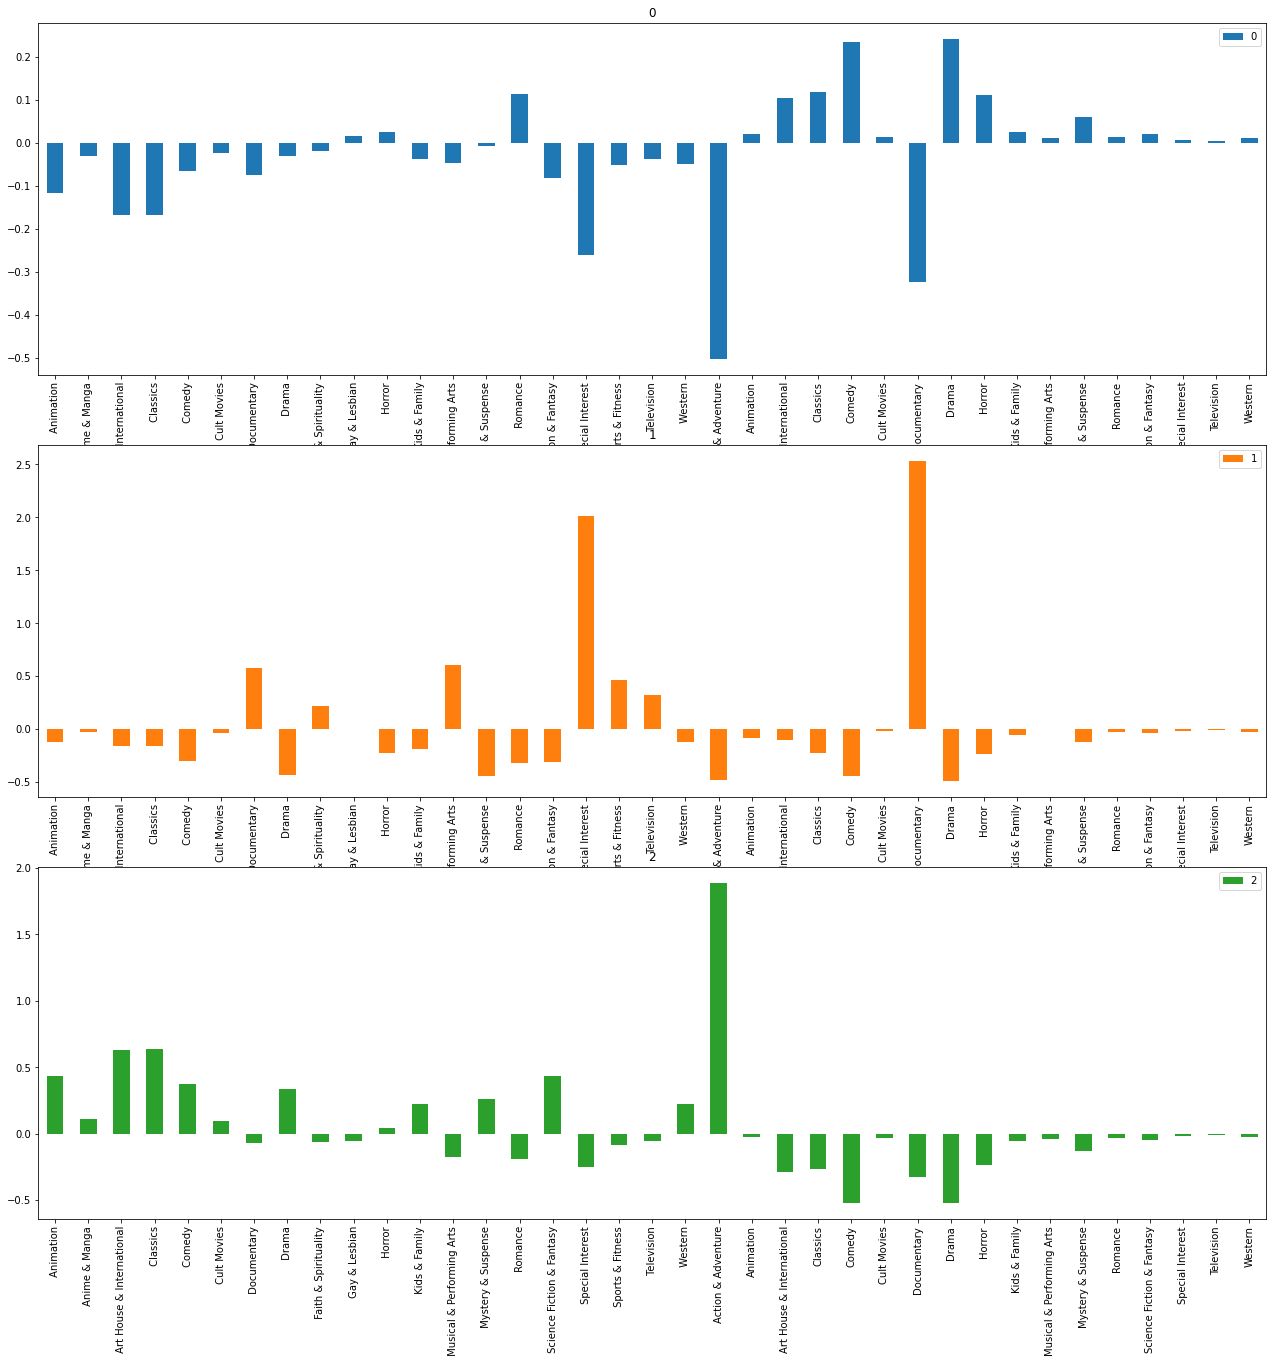

In [38]:
group.transpose().plot.bar(subplots=True,
               figsize=(22, 22),
               sharex=False)

###Fazendo um filtro de samples

In [40]:
grupo = 0

filt = model.labels_ == grupo

movies_conc[filt].sample(10)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,Action & Adventure,Animation,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Television,Western
8284,The Joy Luck Club,Stories told by four elderly Chinese women and...,NaN,R,"Drama, Romance",Wayne Wang,"Amy Tan, Ron Bass","Kieu Chinh, Tsai Chin, France Nuyen, Lisa Lu, ...",1993-09-08,2002-06-04,135.0,Buena Vista Pictures,Fresh,86,36,89.0,27685.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9613,The Mating Habits of the Earthbound Human,If aliens from another galaxy were to observe ...,NaN,R,"Comedy, Special Interest, Romance",Jeff Abugov,Jeff Abugov,"Mackenzie Astin, Carmen Electra, David Hyde Pi...",1999-09-03,2003-01-07,91.0,Earthbound Human Productions,Rotten,33,12,73.0,3438.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12793,Something Wild,A straight-arrow accountant hits it off with a...,"Boasting loads of quirky charm, a pair of lika...",R,"Art House & International, Comedy, Drama",Jonathan Demme,E. Max Frye,"Jeff Daniels, Melanie Griffith, Ray Liotta, Ja...",1986-10-22,2001-06-05,113.0,Orion Pictures Corporation,Fresh,89,36,69.0,6472.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13413,Taking Care of Business,James Belushi and Charles Grodin team up for t...,NaN,R,"Comedy, Drama",Arthur Hiller,Jill Mazurzky Cody,"Jim Belushi, Charles Grodin, Anne De Salvo, Lo...",1990-08-17,2002-04-02,108.0,Hollywood Pictures,Rotten,29,14,52.0,6295.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3067,Basic Instinct,Michael Douglas stars with red-hot Sharon Ston...,"Unevenly echoing the work of Alfred Hitchcock,...",R,"Drama, Horror, Mystery & Suspense, Romance",Paul Verhoeven,Joe Eszterhas,"Michael Douglas, Sharon Stone, George Dzundza,...",1992-03-20,1997-08-26,127.0,Artisan Entertainment,Rotten,53,62,63.0,131882.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8441,Kidnapped,"Jaime, Marta and their daughter Isabel, a well...",Technically impressive yet narratively repelle...,NR,"Art House & International, Drama, Mystery & Su...",Miguel Ángel Vivas,"Miguel Ángel Vivas, Javier García","Fernando Cayo, Manuela Vellés, Ana Wagener, Gu...",2011-06-17,2011-11-29,82.0,Vaca Films,Rotten,39,23,49.0,6591.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9773,Michael,"Michael (Michael Fuith), a seemingly meek insu...",NaN,NR,Drama,Ribhu Dasgupta,Debaloy Bhattacharya,"Nasiruddin Shah, Mahie Gill, Purav Bhandare, S...",2012-02-15,2012-05-15,98.0,Strand Releasing,Fresh,79,39,67.0,2186.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4148,Catch a Fire,Based on the real-life story of Patrick Chamus...,"No stranger to the political thriller, directo...",PG-13,"Drama, Musical & Performing Arts, Mystery & Su...",Phillip Noyce,Shawn Slovo,"Tim Robbins, Derek Luke, Bonnie Henna, Mncedis...",2006-10-27,2007-01-30,102.0,Focus Features,Certified Fresh,75,146,71.0,28961.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5290,Django Unchained,Set in the South two years before the Civil Wa...,"Bold, bloody, and stylistically daring, Django...",R,"Drama, Western",Quentin Tarantino,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012-12-25,2013-04-16,165.0,The Weinstein Co.,Certifi

### Visualizando as dimensões - redução de dimensão perdese informação 

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE()

vizu = tsne.fit_transform(scaler_genre)
vizu

array([[ 20.678085 , -61.30843  ],
       [  6.6672587,   6.8211236],
       [ 55.762745 ,  12.340264 ],
       ...,
       [ 31.378693 ,  58.042233 ],
       [-38.809166 ,  26.176495 ],
       [ -1.8254249, -43.973114 ]], dtype=float32)

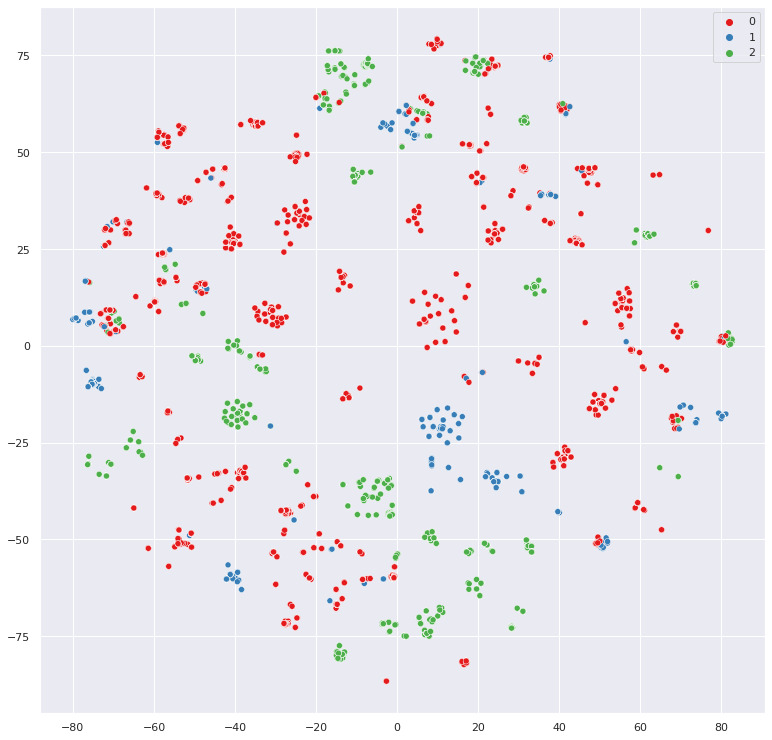

In [43]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=vizu[:, 0],
               y=vizu[:, 1],
               hue=model.labels_,
               palette=sns.color_palette('Set1', 3))

###Clusterizando com 20 ao inves de 3 grupos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5c05829e8>,
      dtype=object)

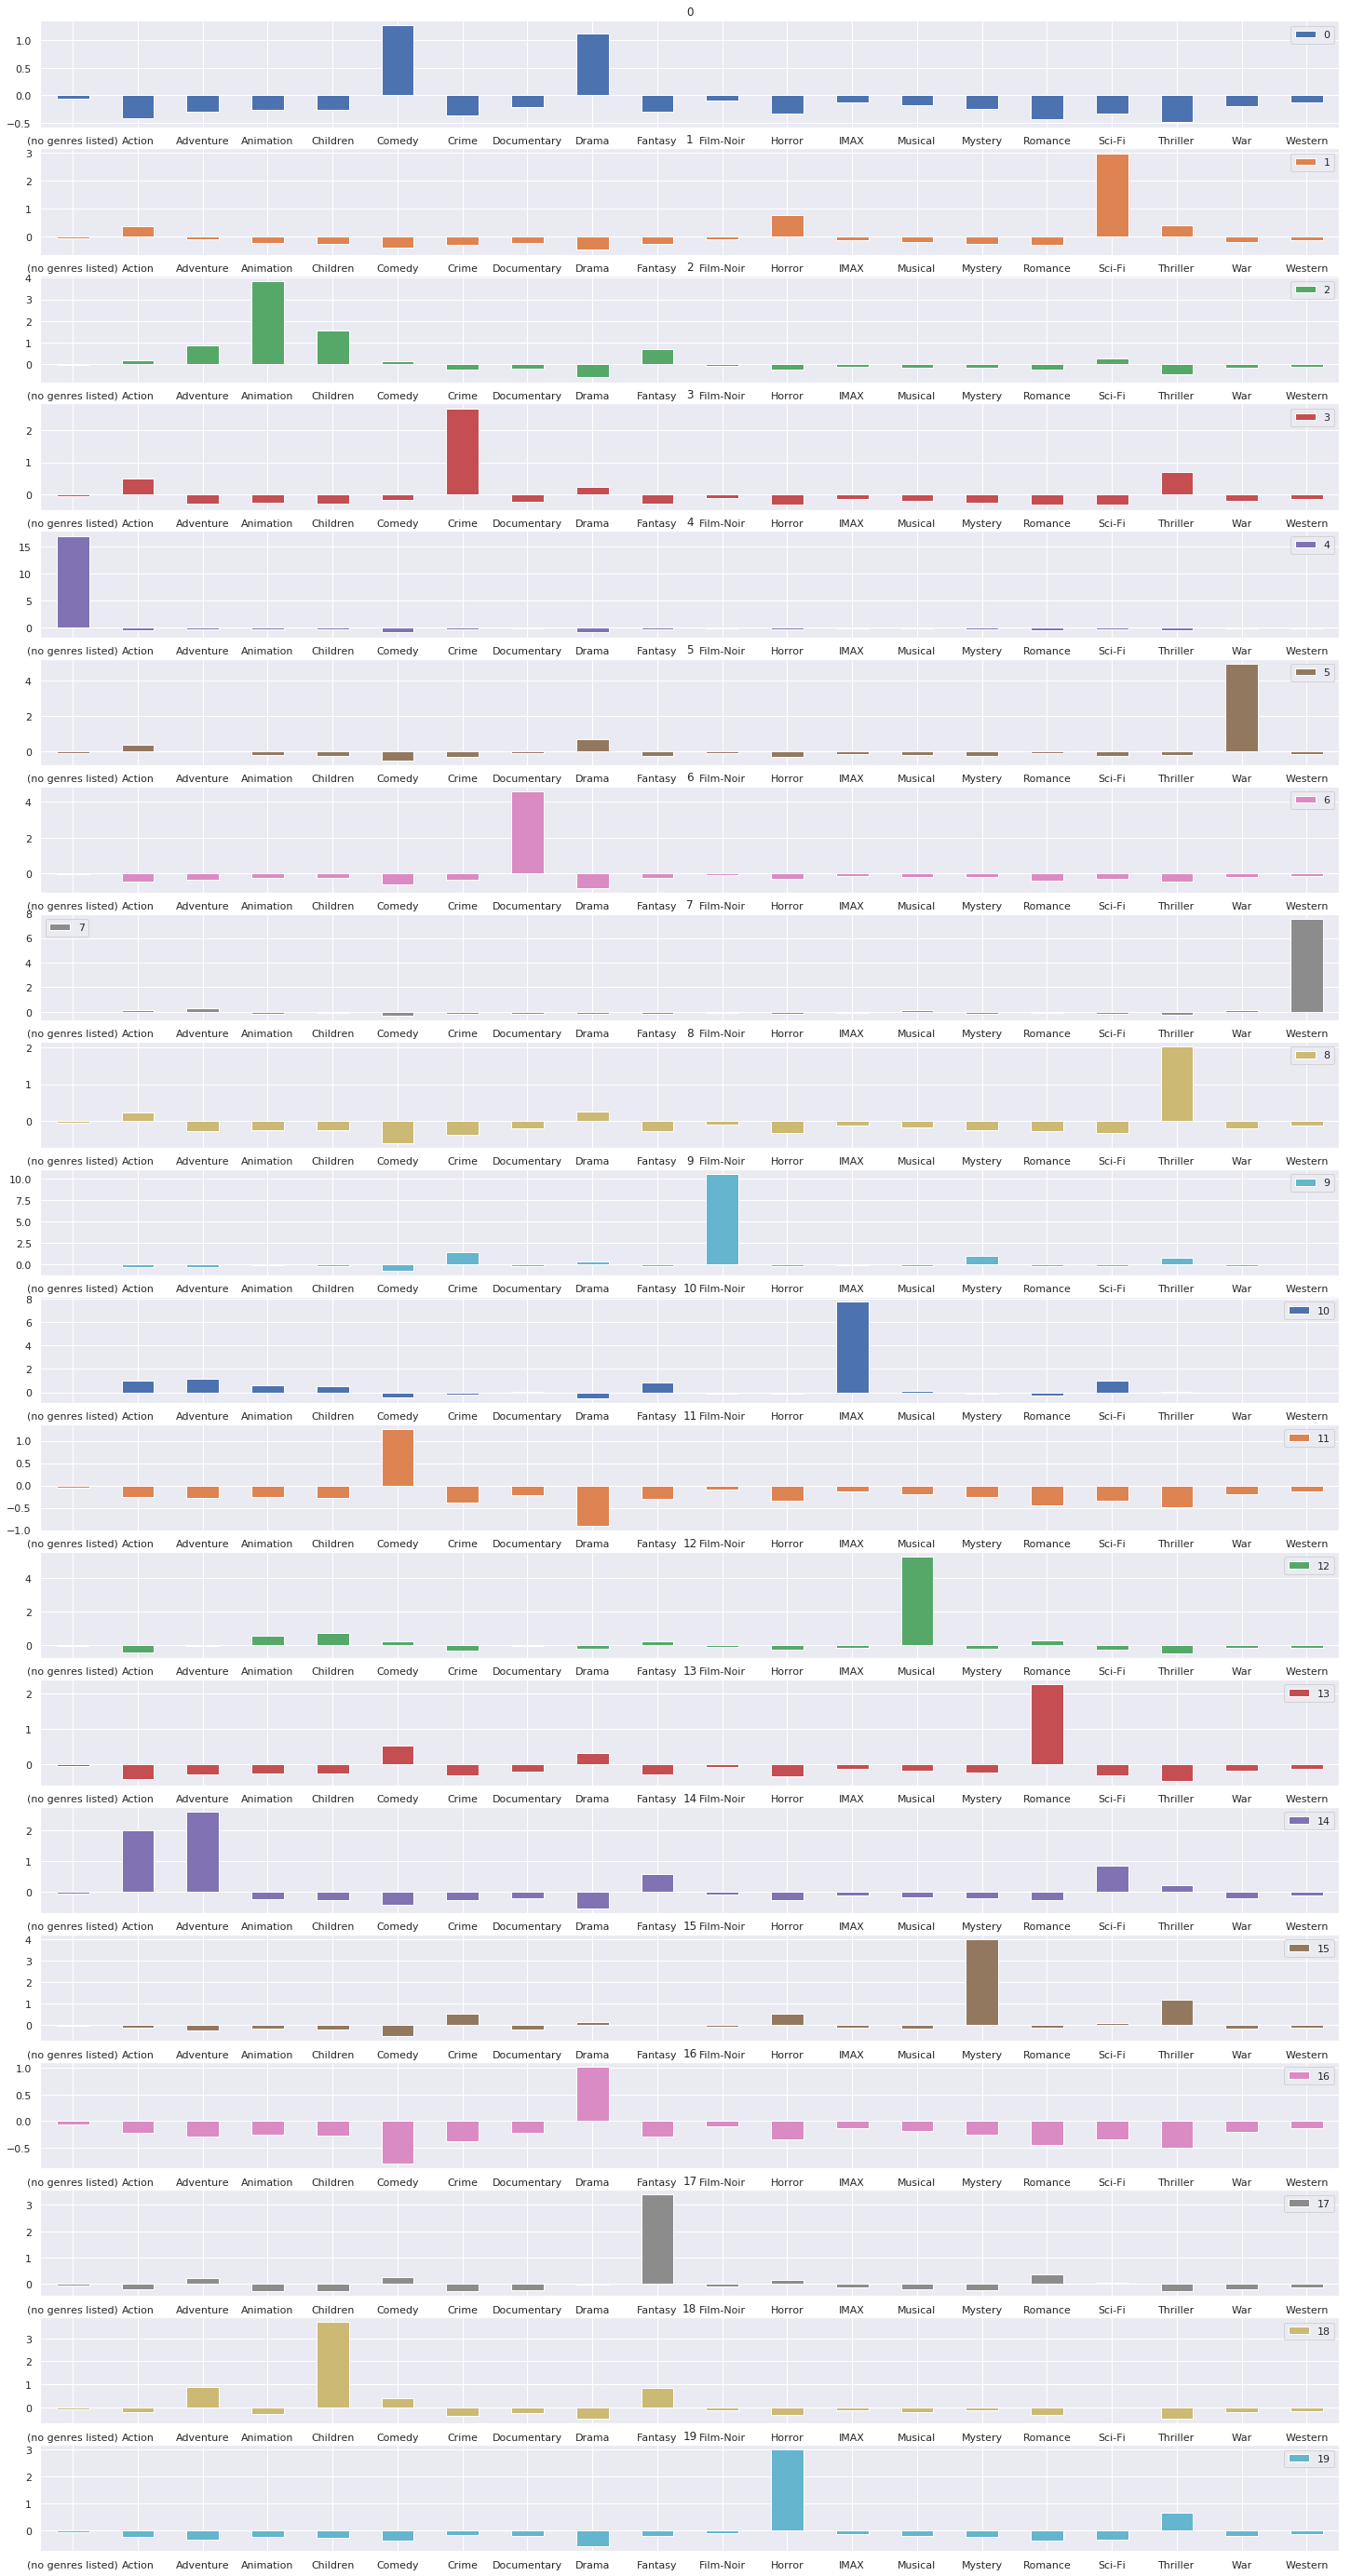

In [ ]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [ ]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7279,74791,"Town Called Panic, A (Panique au village) (2009)",Animation,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8080,99813,"Batman: The Dark Knight Returns, Part 2 (2013)",Action|Animation,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8231,104076,"Smurfs 2, The (2013)",Animation|Children|Comedy,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9601,176051,LEGO DC Super Hero Girls: Brain Drain (2017),Animation,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8534,115065,Justin and the Knights of Valour (2013),Adventure|Animation,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8047,98604,From Up on Poppy Hill (Kokuriko-zaka kara) (2011),Animation|Drama|Romance,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2694,3615,Dinosaur (2000),Adventure|Animation|Children,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,68954,Up (2009),Adventure|Animation|Children|Drama,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,83132,"Secret World of Arrietty, The (Kari-gurashi no...",Animation|Children|Fantasy,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9548,172887,Kid's Story (2003),Animation|Sci-Fi,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [ ]:
kmeans(20, generos_escalados)

[20, 57104.93720306674]

In [ ]:
kmeans(3, generos_escalados)

[3, 166226.32865439524]

In [ ]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179483.94029403635],
 [3, 167109.1819301267],
 [4, 156805.27020228506],
 [5, 147443.51287471023],
 [6, 138672.3960647879],
 [7, 128329.89023941127],
 [8, 117097.09076731533],
 [9, 110662.22958410968],
 [10, 101325.42343560503],
 [11, 93738.1979825316],
 [12, 86128.11834826067],
 [13, 79720.49427535535],
 [14, 75275.79822354915],
 [15, 68020.48336500165],
 [16, 63739.94406721202],
 [17, 60978.792165263425],
 [18, 58357.335248827956],
 [19, 58122.02544841826],
 [20, 57030.86552578748],
 [21, 53859.96569165589],
 [22, 51543.133495246846],
 [23, 50121.38813206847],
 [24, 49598.8923979011],
 [25, 48113.44127764335],
 [26, 46568.21912135742],
 [27, 45975.13601818942],
 [28, 44567.158489444904],
 [29, 43857.09486943863],
 [30, 43269.96463332317],
 [31, 42290.811359577616],
 [32, 41008.02098984361],
 [33, 40646.08784635828],
 [34, 39321.777821318945],
 [35, 38347.80715092857],
 [36, 38381.713178964994],
 [37, 37610.00291168513],
 [38, 36597.07026229276],
 [39, 35795.024805

In [ ]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179483.940294
2,3,167109.181930
3,4,156805.270202
4,5,147443.512875
5,6,138672.396065
6,7,128329.890239
7,8,117097.090767
8,9,110662.229584
9,10,101325.423436


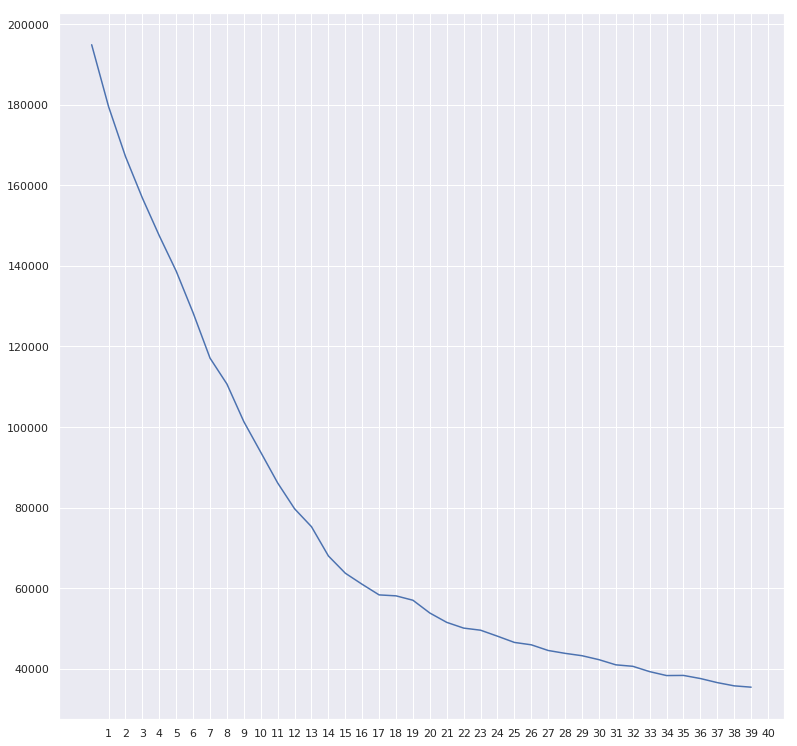

In [ ]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5bde73828>,
      dtype=object)

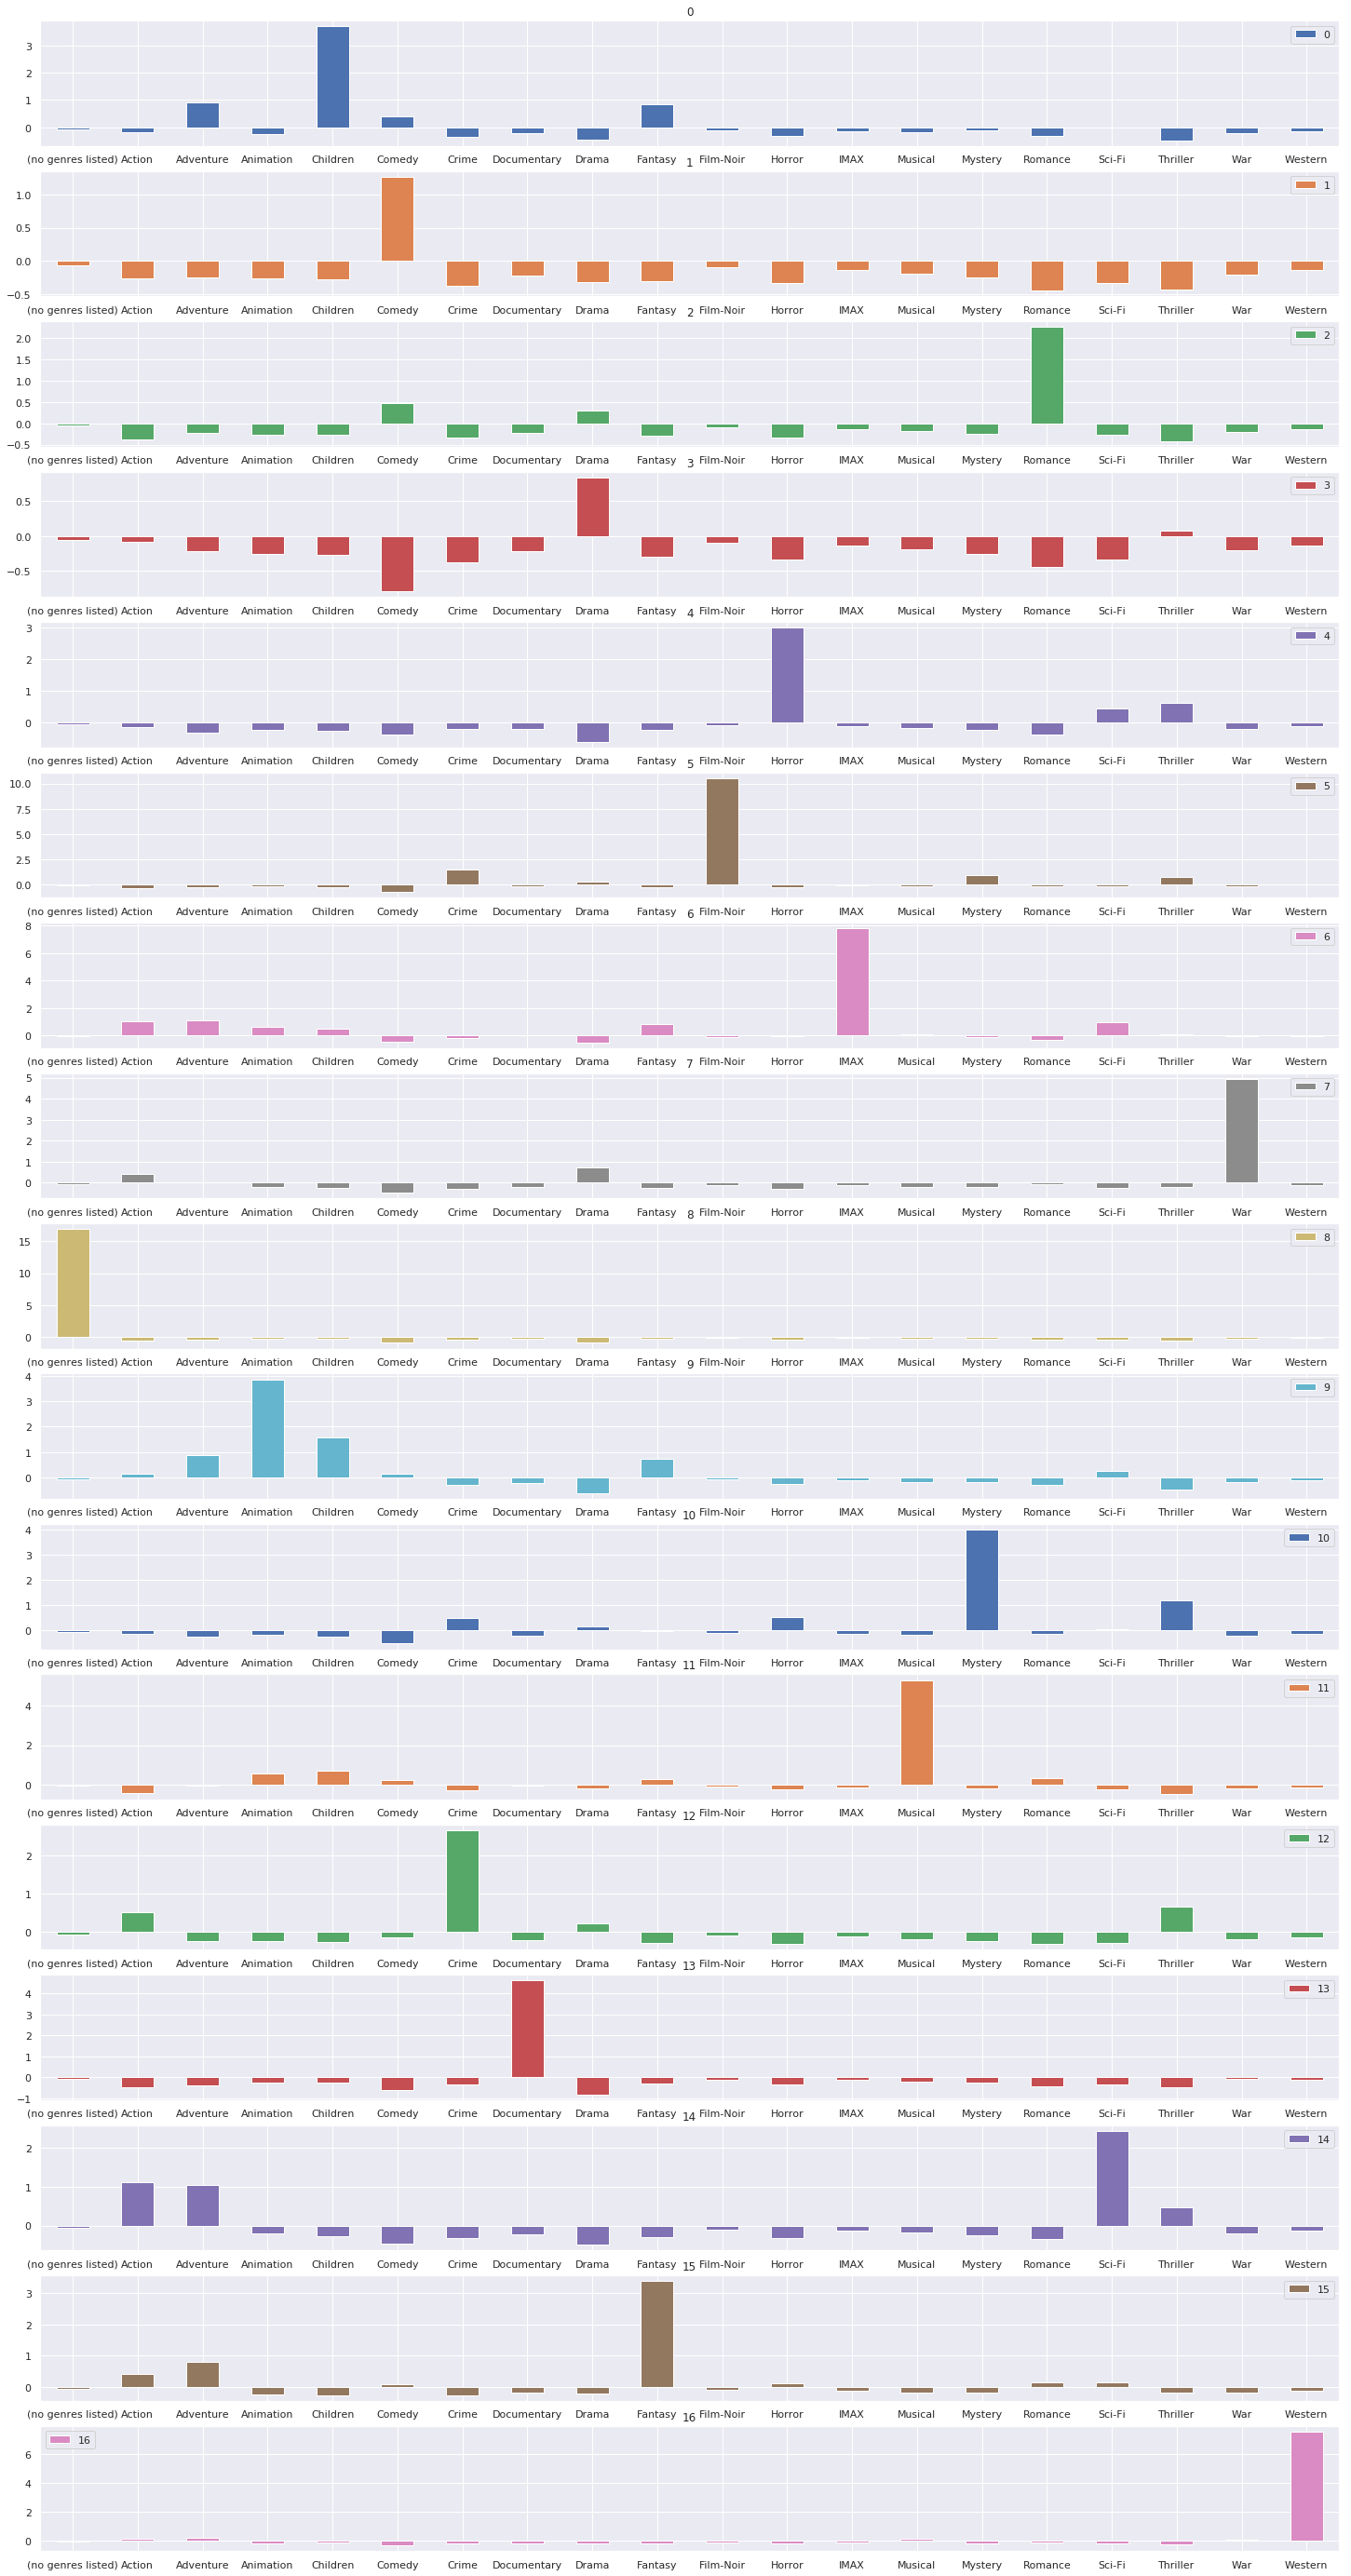

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [ ]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2733,3671,Blazing Saddles (1974),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
399,458,Geronimo: An American Legend (1993),Drama|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7483,82459,True Grit (2010),Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3259,4406,"Man Who Shot Liberty Valance, The (1962)",Crime|Drama|Western,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
376,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6648,56782,There Will Be Blood (2007),Drama|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2896,3873,Cat Ballou (1965),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5479,26249,They Call Me Trinity (1971),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2743,3681,For a Few Dollars More (Per qualche dollaro in...,Action|Drama|Thriller|Western,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
903,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 29.239061 , -61.942688 ],
       [ 53.922688 , -52.700977 ],
       [-12.707917 ,  17.128963 ],
       ...,
       [ 33.94113  ,   5.276442 ],
       [-13.571043 , -47.659454 ],
       [ -2.0098999,  -6.5729895]], dtype=float32)

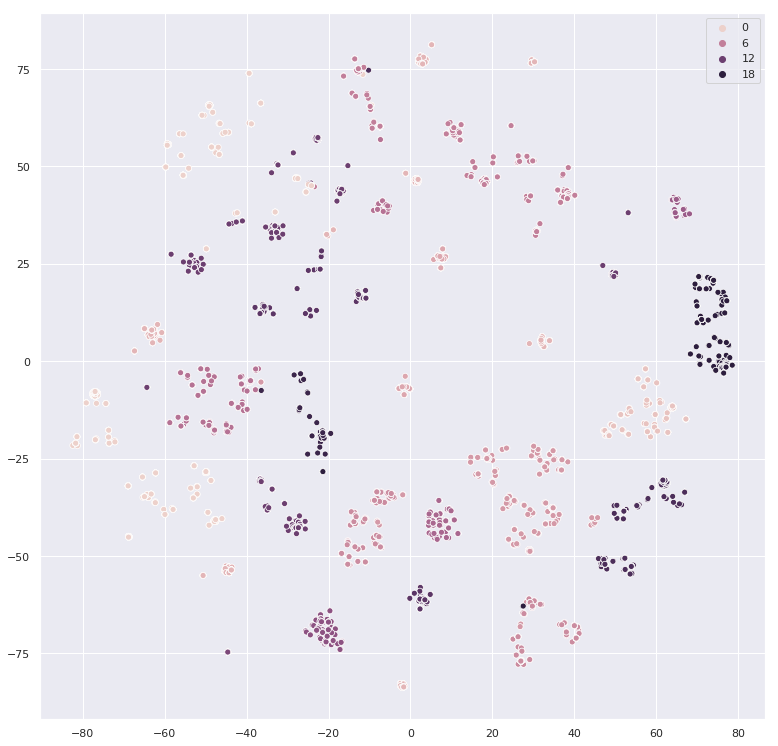

In [ ]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5bb1bfdd8>,
      dtype=object)

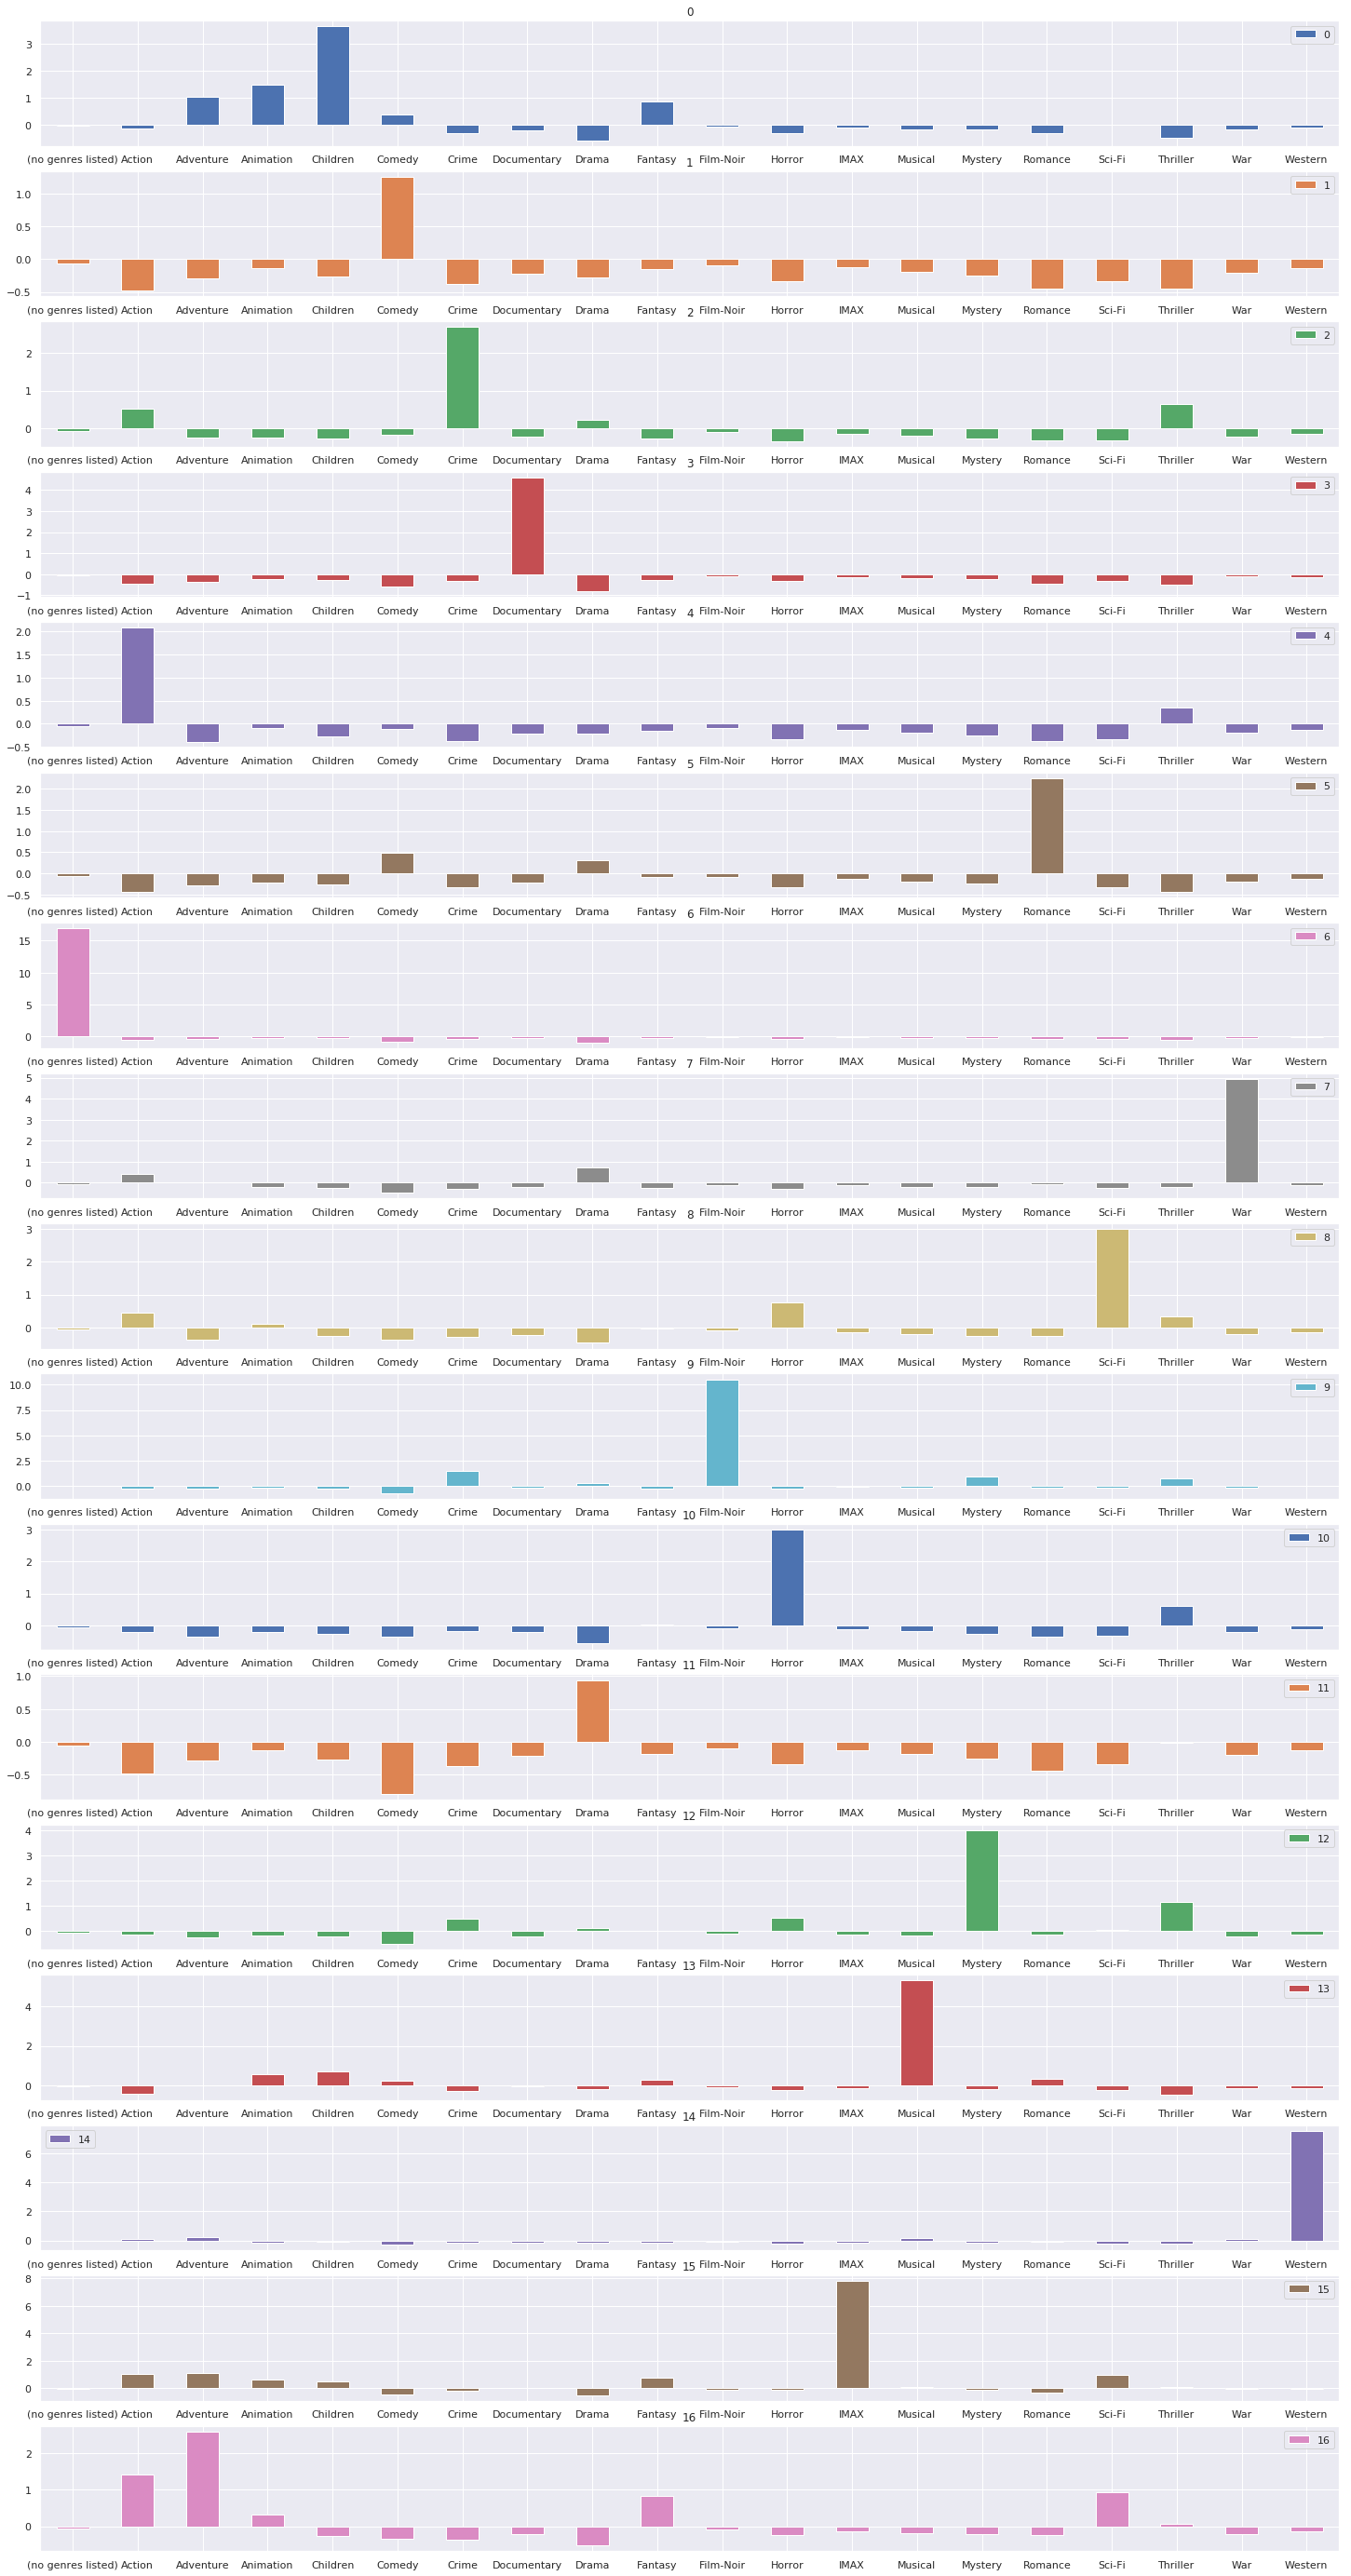

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [ ]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        , 11.        ,  2.42987209,  2.        ],
       [ 5.        , 17.        ,  2.87485746,  3.        ],
       [ 4.        , 18.        ,  2.91858518,  4.        ],
       [ 2.        , 19.        ,  3.41893186,  5.        ],
       [16.        , 20.        ,  3.50811997,  6.        ],
       [10.        , 21.        ,  3.75922045,  7.        ],
       [ 8.        , 22.        ,  3.88448948,  8.        ],
       [ 0.        , 23.        ,  4.6808461 ,  9.        ],
       [12.        , 24.        ,  4.68874519, 10.        ],
       [ 3.        , 25.        ,  5.15266168, 11.        ],
       [ 7.        , 26.        ,  5.27047759, 12.        ],
       [13.        , 27.        ,  5.79762689, 13.        ],
       [14.        , 28.        ,  7.87409402, 14.        ],
       [15.        , 29.        ,  8.11856361, 15.        ],
       [ 9.        , 30.        , 10.81675845, 16.        ],
       [ 6.        , 31.        , 17.06440188, 17.        ]])

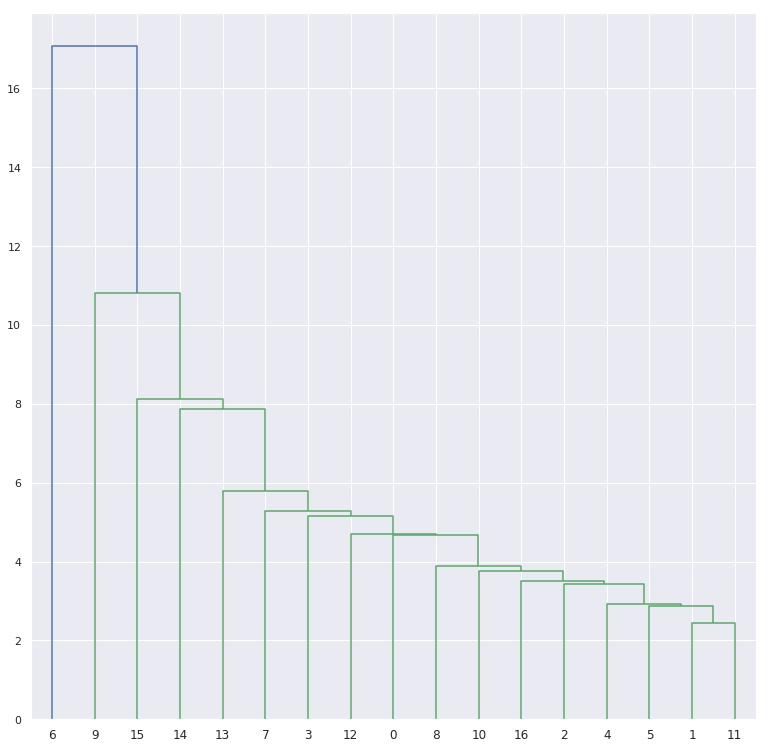

In [ ]:
dendrograma = dendrogram(matriz_de_distancia)